# Session 12.1

Currency trading
(Slightly simplified version of 15.3-6 from Cormen et al.)

Imagine that you wish to exchange one currency for another. You realize that instead of directly exchanging one currency for another, you might be better off making a series of trades through other currencies, winding up with the currency you want.

Suppose that you can trade n different currencies, numbered 1,2,… ,n, where you start with currency 1 and wish to wind up with currency n. You are given, for each pair of currencies i and j , an exchange rate rij , meaning that if you start with d units of currency i , you can trade for drij units of currency j. Note that the total number of trades allowed is limited to n.

Assuming there is no commission, write python code to solve this problem using either a memoization or bottom-up strategy.

In [1]:
#This problem is similar to that of path finding.
#We can think of currencies as nodes, and the exchange rate from one to another represented by the edge between them.
#I.e. the simple path from one node to another (each node is connected in the network graph)
#The question then becomes finding the path from node i to j that maximises the potential increase, 
#subject to the constraint that the length of the path <=n.

#In the case of 3 currencies i,j,p. The best trade from i to j will be given by either rij, or rip*rpj.

#In the case of 4 currencies i,j,p,l. The best trade from i to j will be given by either rij, or rip*rpj, 
#or ril*rpj, or ril*rlp*rlj=rip*rpl*rlj(assuming exchange rates are the same both ways).

#In the case of n currencies, the optimal trade between i and j will be given by the max of all the 
#paths of length one through all the paths of length n.


def currency_arbitrage(exchange_rates):
    '''
    Constructing the optimal trade of length n,
    requires knowing the optimal trades of length 1,2...n-1.
    Consequently, using bottom-up approach, 
    and given the optimal trades of length 1
    '''
    n = len(exchange_rates)
    
    #For each path length
    for k in range(1,n+1):
        
        #For each currency
        for i in range(n):
            new_best_currency = []
            
            #For currency it can be traded with
            for j in range(n):
                
                #Find currency max for k trades
                new_best_currency.append(max(exchange_rates[i][j],
                                           max([exchange_rates[i][x]*exchange_rates[i][j] for x in range(n) if x is not j])))
            
            #Update currency max for k trades
            for j in range(n):
                exchange_rates[i][j] = new_best_currency[j] 
                
    return exchange_rates

In [15]:
example_rates = [[1, 0,741, 0.657, 1.061, 1.005],
                 [1.349, 1, 0.888, 1.433, 1.366],
                 [1.521, 1.126, 1, 1.614, 1.538],
                 [0.942, 0.698, 0.619, 1, 0.953],
                 [0.995, 0.732, 0.650, 1.049, 1]]

print(len(example_rates))
for j in range(len(example_rates)):
    for i in range(len(example_rates)):
        print(example_rates[j][i])

currency_arbitrage(example_rates)

5
1
0
741
0.657
1.061
1.349
1
0.888
1.433
1.366
1.521
1.126
1
1.614
1.538
0.942
0.698
0.619
1
0.953
0.995
0.732
0.65
1.049
1


[[2.0082699328180005e+46,
  0,
  2.130774398719899e+46,
  1.3194333458614264e+46,
  2.130774398719899e+46,
  1.005],
 [45889.30562541178,
  34017.276223433495,
  30207.341286408944,
  46467.59932121015,
  46467.59932121015],
 [2055562.7179061826,
  1521738.0804486272,
  1351454.778373559,
  2078537.4491385338,
  2078537.4491385338],
 [0.942, 0.698, 0.619, 1, 0.953],
 [2.1390990352177632,
  1.5736889384717614,
  1.3974013797904987,
  2.1498482766007676,
  2.1498482766007676]]

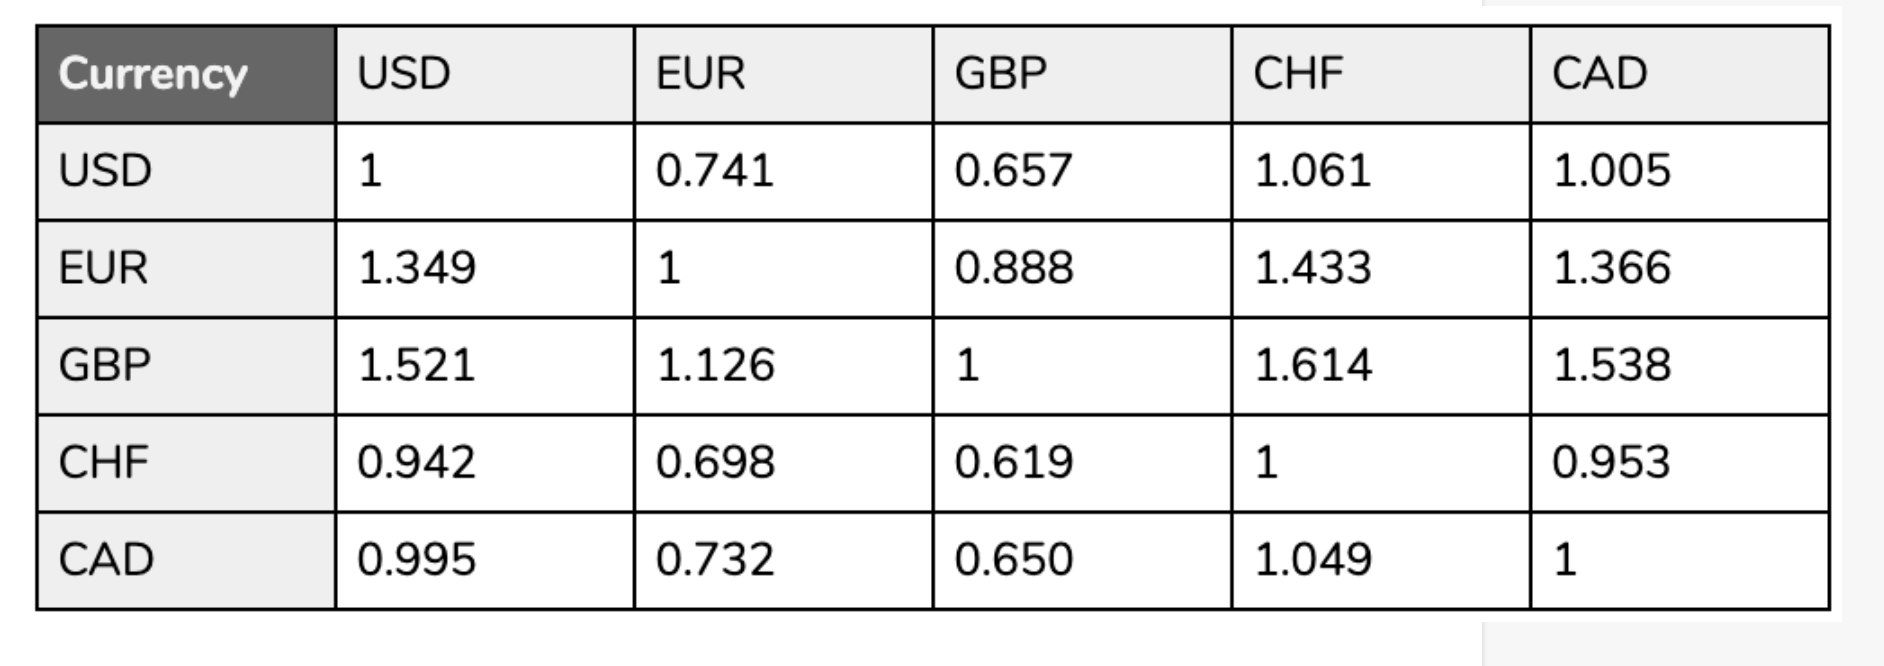

Optimal Strategy for a Money Game

Consider a row of n coins of values v(1) ... v(n), where n is even. We play a game against an opponent by alternating turns. In each turn, a player selects either the first or last coin from the row, removes it from the row permanently, and receives the value of the coin. Determine the maximum possible amount of money we can definitely win if we move first.

For example, consider the game:

$2, $10, $1, $5
By moving first and playing optimally one can be guaranteed of $15. The first move is to take $5. This forces your opponent to take either $2 or $1, and then allows you to take $10.
​

Write python code to solve the game using a bottom-up strategy. You should assume that the opposing player also plays optimally.

In [28]:
#Money game
def money_game(money):
    n = len(money)
    
    #Create table to store subsolution
    table = [[0 for i in range(n)] 
                for i in range(n)]
    
    for iteration in range(n):
        for right in range(iteration, n):
            
            left = right - iteration
            
            #a represents when both players take a coin from the left
            #b when one from left and one from right
            #c when two from right
            a = b = c = 0
            
            if((left + 2) <= right): 
                a = table[left + 2][right] 
      
            if((left + 1) <= (right - 1)): 
                b = table[left + 1][right - 1] 
           
            if(left <= (right - 2)): 
                c = table[left][right - 2] 
                
            table[left][right] = max(money[left] + min(a, b), 
                              money[right] + min(b, c)) 
    return table[0][n - 1]

# First session 11.1

In [ ]:
def fibonacci(n):
    fib = {}
    for i in range(1, n+1):
        if i <= 2:
            f = 1
        else:
            f = fib[i-1] + fib[i-2]
        fib[i] = f
        
    return fib[n]

In [ ]:
fibonacci(40)

# Rod-Cutting Problem

In [ ]:
#Recursive Top-Down implementation
def recursive_cut_rod(p, n):
    '''
    Where p an array of the sale price of each rod length
    and n the length of the rod to be cut
    '''
    
    #No rod, no money
    if n == 0:
        return 0
    
    q = -1
    
    #Try every possible way to cut the rod,
    #Select the way that gives the highest sale price
    for i in range(1, n+1):
        q = max(q, p[i]+recursive_cut_rod(p, n-i))
    
    #Return the sales price
    return q

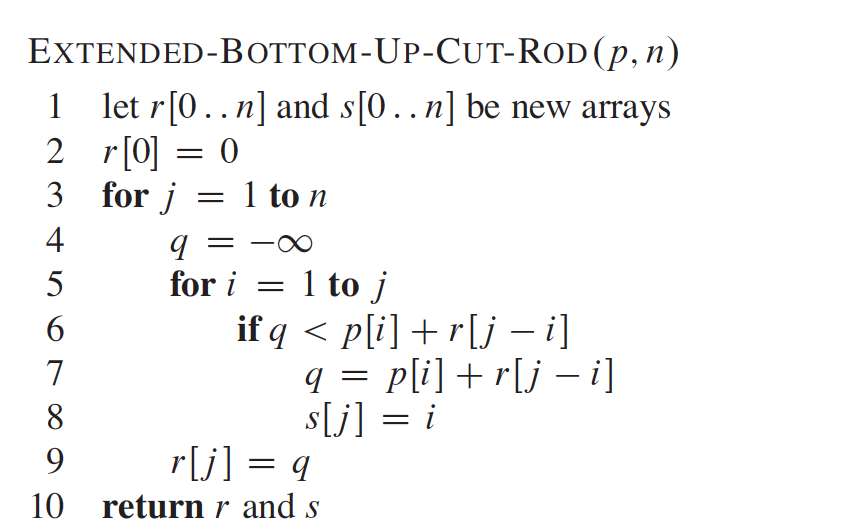

In [1]:
#DP, bottom up implementaion

def Extended_Bottom_Up_Cut_Rod(p, n):
    '''
    Where p an array of the sale price of each rod length
    and n the length of the rod to be cut
    r the maximum revenue for a rod of a certain size
    s the best cut of a rod of a certain size
    j the current size of the rod
    '''
    
    #New dictionaries
    r, s = {}, {}
    
    r[0] = 0
    
    #For j from 1 up to n
    for j in range(1, n+1):
        
        #Initialize q at unattainably small number
        q = 0# Rod cutting using dynamic programming

        
        #Try every possible way to divide a rod of length j
        #Pick solution that maximises revenue
        for i in range(1, j+1):
            
            if q < p[i] + r[j-i]:
                q = p[i] + r[j-i]
                
                #Store the best place to cut a rod of length j
                s[j] = i
        
        #Store the maximum revenue possible from a rod of length j
        r[j] = q
    
    return r, s


#Printing outputs
def print_rod_cut_solution(p, n):
    r, s =   Extended_Bottom_Up_Cut_Rod(p, n)
    
    #Until no more rod
    while n>0:
        #print best cut
        print(s[n])
        
        #Shorten remaining rod by cut
        n = n-s[n]

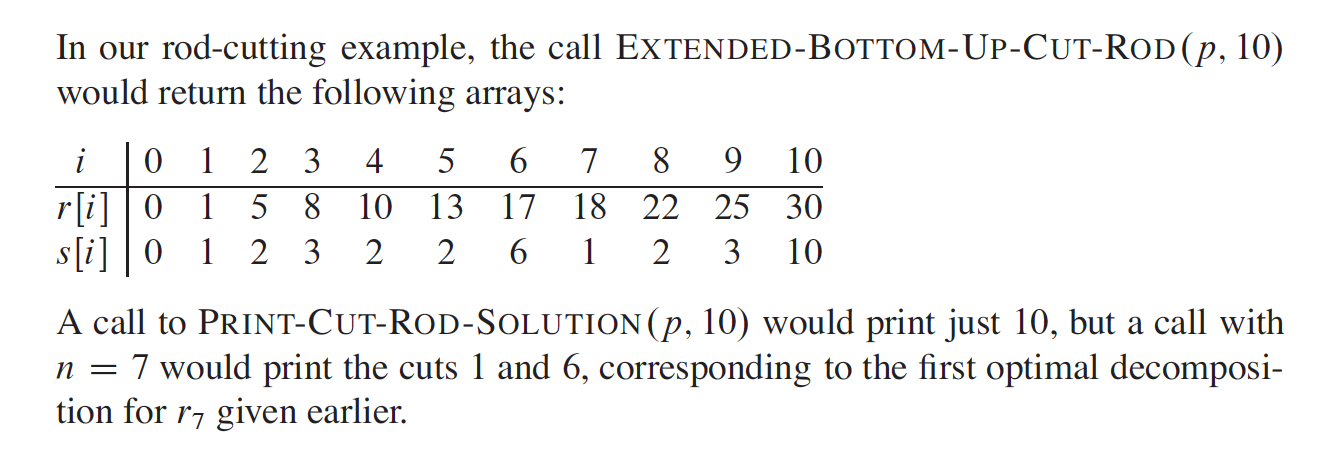

In [2]:
#Check they work
example_prices = [0, 1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
print(recursive_cut_rod(example_prices, 10))
Extended_Bottom_Up_Cut_Rod(example_prices, 10)

NameError: name 'recursive_cut_rod' is not defined

In [3]:
#Plotting time complexity comparision
import random
import time
import matplotlib.pyplot as plt

#initialize storages
rec_time = []
dp_time = []
rod_lengths = [j for j in range(1, 20)]

for l in rod_lengths:
    rec_temp = 0
    dp_temp = 0
    
    for _ in range(5):

        prices = [random.randint(1, i)+i for i in range(1, l+2)]
    
        #Recusion time solution
        start = time.time()
        recursive_cut_rod(prices, l)
        end = time.time()
        rec_temp += end-start
        
        #Dp time
        start = time.time()
        Extended_Bottom_Up_Cut_Rod(prices, l)
        end = time.time()
        dp_temp += end-start
        
    rec_time.append(rec_temp/5)
    dp_time.append(dp_temp/5)
    
    
plt.figure(figsize=(12, 10), dpi=70)
plt.plot(rod_lengths, rec_time, label= "Recursion") 
plt.plot(rod_lengths, dp_time, label= "Dynamic Programming")
plt.legend(loc=0)
plt.show()    

NameError: name 'recursive_cut_rod' is not defined